In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

### Acquire

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


***
Notes: 
* no null entries
* HeartDisease int64 ?
***

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


***
Notes: 
* Cholesterol max looks like a potential anamoly
* FastingsBS data doesn't look normally distributed
* Oldpeak ????
* Heart Disease looks to be binary
***

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


***
* HeartDisease already dummmied
* ST_Slope looks like it may need to be binary; check
* What is Oldpeak
* ExerciseAngina needs to be dummied
* RestingECG needs to be dummied
* Investigate FastingBS
* ChestPainType needs to be dummied
* Sex needs to be dummied
***

In [9]:
# Oldpeak value
data.Oldpeak.value_counts().head(6)

0.0    368
1.0     86
2.0     76
1.5     53
3.0     28
1.2     26
Name: Oldpeak, dtype: int64

(array([  2.,   5., 374., 118., 236., 119.,  44.,  17.,   1.,   2.]),
 array([-2.6 , -1.72, -0.84,  0.04,  0.92,  1.8 ,  2.68,  3.56,  4.44,
         5.32,  6.2 ]),
 <BarContainer object of 10 artists>)

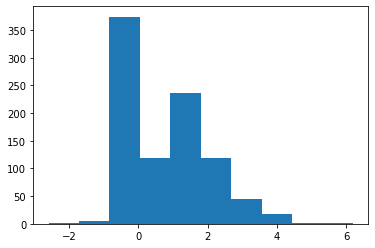

In [10]:
plt.hist(data.Oldpeak)

In [11]:
# Determine number of different labels for RestingECG
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [12]:
# Determine number of different labels for ST_Slope
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [18]:
num_cols = data.columns[[data[col].dtype != 'object' for col in data.columns]]
cat_cols = data.columns[[data[col].dtype == 'object' for col in data.columns]]

In [19]:
len(cat_cols)

5

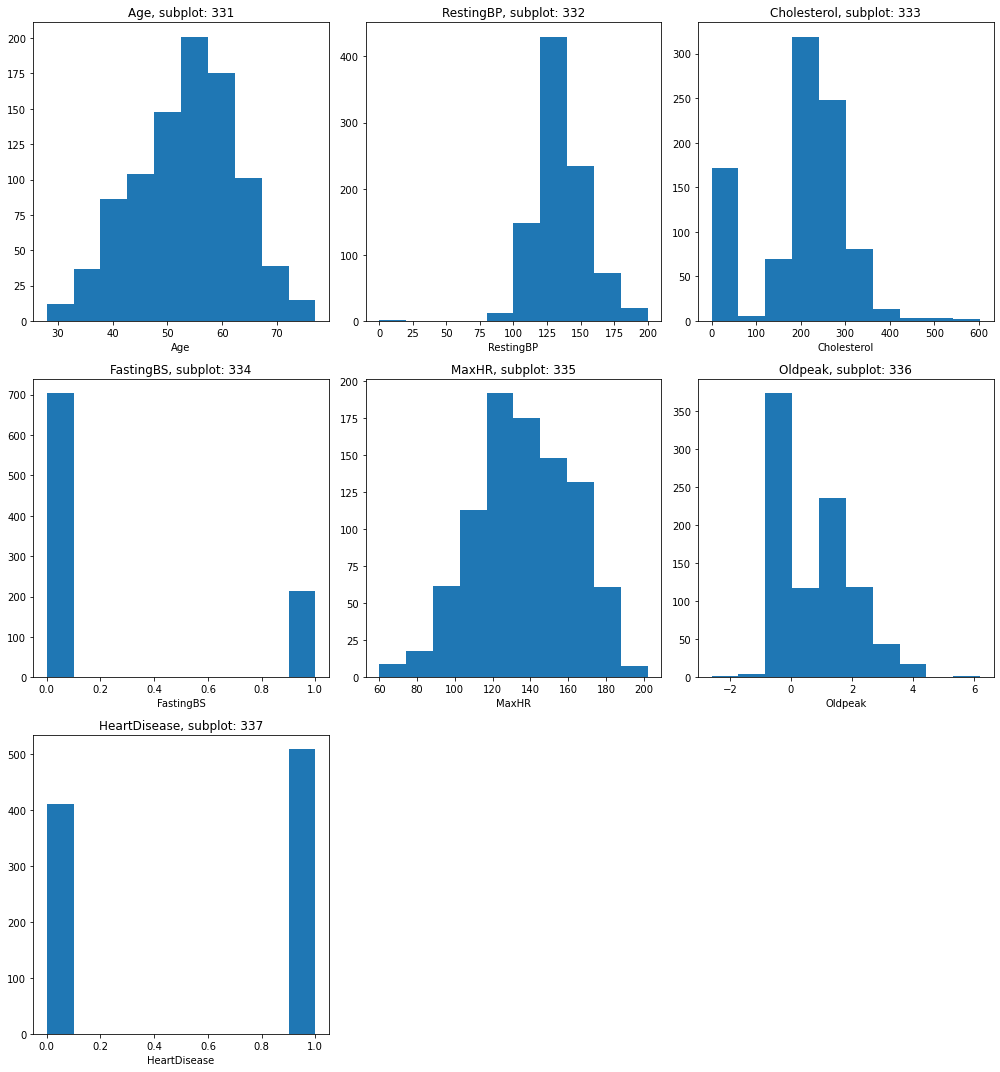

In [21]:
#  Numerical Data
b = 3 
a = math.ceil(len(num_cols)/b)  # number of rows
 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,15))

for i in num_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    fig.tight_layout()
    plt.hist(data[i])
    c = c + 1

In [16]:
#  Categorical Data
a = math.ceil((len(cat_cols))/b) # number of rows  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,15))

for i in cat_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    fig.tight_layout()
    plt.hist(data[i])
    c = c + 1

NameError: name 'b' is not defined

In [1]:
# Look at cadinality of the categorical columns
cards = [len(data_train[col].unique()) for col in cat_cols]
fig,ax = plt.subplots(figsize=(18,6))
sns.barplot(x=cat_cols, y=cards)
ax.set_xlabel('Feature')
ax.set_ylabel('Number of Categories')
ax.set_title('Feature Cardinality')

NameError: name 'cat_cols' is not defined

## Prepare